In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
#Defining path to the dataset
train = pd.read_csv(r'/Users/mac/Desktop/AI Final/Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#testing dataset
test = pd.read_csv(r'/Users/mac/Desktop/AI Final/Test.csv')

In [4]:
#Reading the dataset
print("Train : ", train.shape)
print("Test : ", test.shape)

Train :  (8523, 12)
Test :  (5681, 11)


In [5]:
#listing out the trained information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# To look at the unique observations from each of the features
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
# To check if there are any null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Total percentage of the missing values
missing_data = train.isnull().sum()
total_percentage = (missing_data.sum()/train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent_total = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


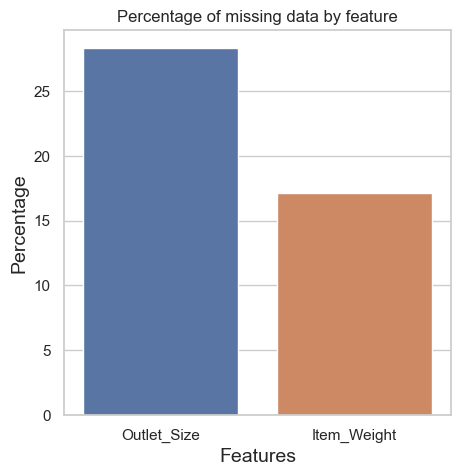

In [10]:
# Plotting the percentage of missing values
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [11]:
# Filling the null values with the mean value
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Mapping the categorical values and then replacing it with the median value
train['Outlet_Size'] = train['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

print("The median value : ", train['Outlet_Size'].median())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].median())
train.isnull().sum()

The median value :  2.0


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# Replacing it back into categorical values
train['Outlet_Size'] = train['Outlet_Size'].replace(1.000000,'Small')
train['Outlet_Size'] = train['Outlet_Size'].replace(2.000000,'Medium')
train['Outlet_Size'] = train['Outlet_Size'].replace(3.000000,'High')

In [14]:
# Changing the data type of establishment year into a object, as the years are not representing any numerical values but categorical
train['Outlet_Establishment_Year']  = train['Outlet_Establishment_Year'].astype('object')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [15]:
# Statistical description of the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [16]:
# The minimum value of the item visibility feature is zero(0)
# Replacing the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
train['Item_Visibility'] = train['Item_Visibility'].replace(0.000000,0.003574698)

<AxesSubplot:title={'center':'Box-plot of Item outlet sales'}, xlabel='Item_Outlet_Sales'>

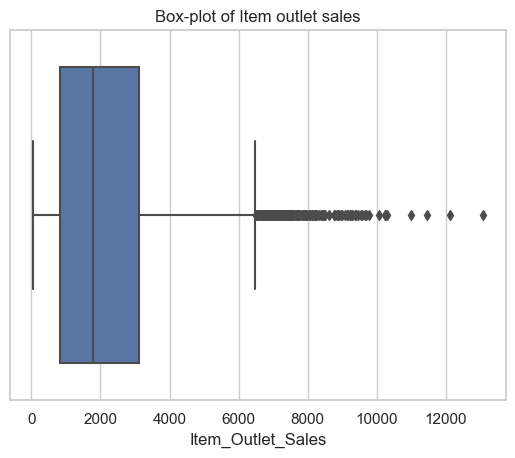

In [17]:
# Detecting the outliers and then removing it 
plt.title('Box-plot of Item outlet sales')
sns.boxplot('Item_Outlet_Sales',data=train)

In [18]:
train=train[train['Item_Outlet_Sales']<6250]

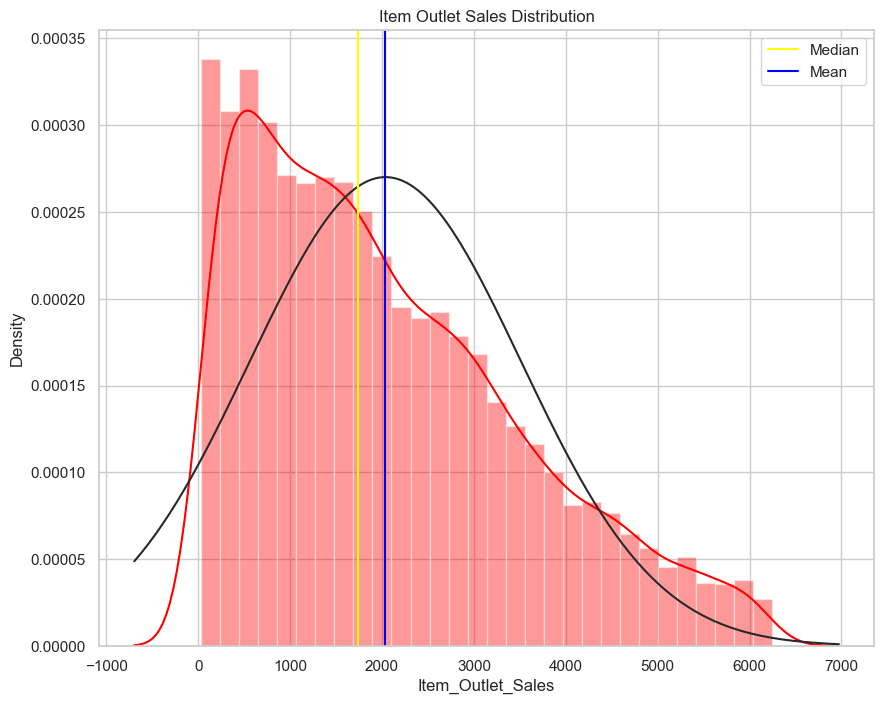

In [19]:
# Plotting the distribution of the feature
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Outlet_Sales'], fit = norm, color='red')
plt.title('Item Outlet Sales Distribution')
plt.axvline(train['Item_Outlet_Sales'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Outlet_Sales'].mean(),color='blue',label='Mean')
plt.legend()

In [20]:
print ("Skewness :", train['Item_Outlet_Sales'].skew())
print("Kurtosis : ", train['Item_Outlet_Sales'].kurt())

Skewness : 0.7465498292522866
Kurtosis :  -0.20819765076564778


<AxesSubplot:title={'center':'Box-plot of Item outlet sales after removing the outliers'}, xlabel='Item_Outlet_Sales'>

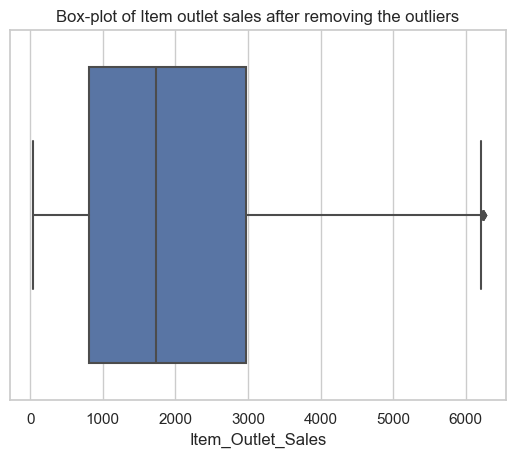

In [21]:
plt.title('Box-plot of Item outlet sales after removing the outliers')
sns.boxplot('Item_Outlet_Sales',data=train)

<AxesSubplot:title={'center':'Box-plot of Item visibilty'}, xlabel='Item_Visibility'>

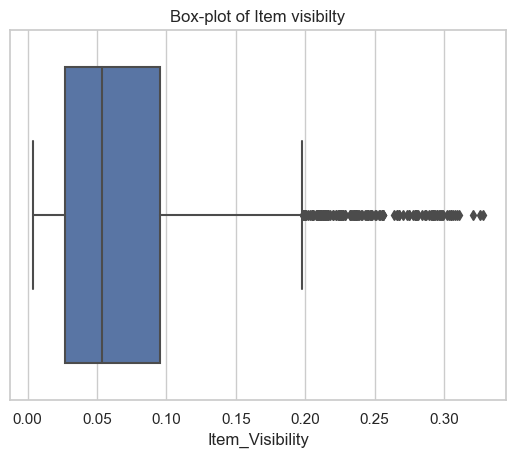

In [22]:
plt.title('Box-plot of Item visibilty')
sns.boxplot('Item_Visibility',data=train)

In [23]:
train=train[train['Item_Visibility']<0.195]

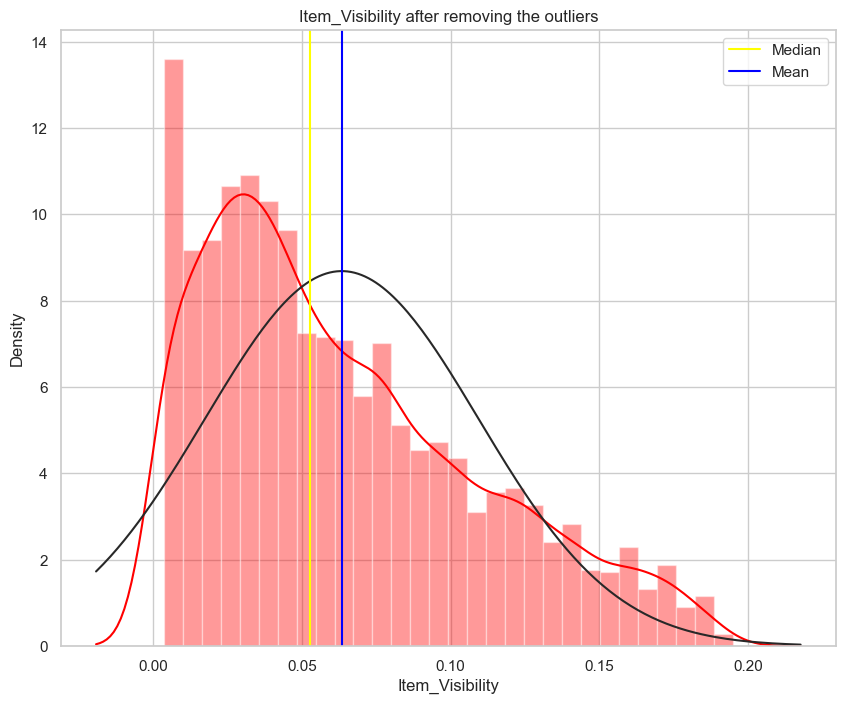

In [24]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Visibility'], fit = norm, color='red')
plt.title('Item_Visibility after removing the outliers')
plt.axvline(train['Item_Visibility'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Visibility'].mean(),color='blue',label='Mean')
plt.legend()

In [25]:
print ("Skewness :", train['Item_Visibility'].skew())
print("Kurtosis : ", train['Item_Visibility'].kurt())

Skewness : 0.7591589807770595
Kurtosis :  -0.2677919270881941


<AxesSubplot:title={'center':'Box-plot of Item visibilty after removing the outliers'}, xlabel='Item_Visibility'>

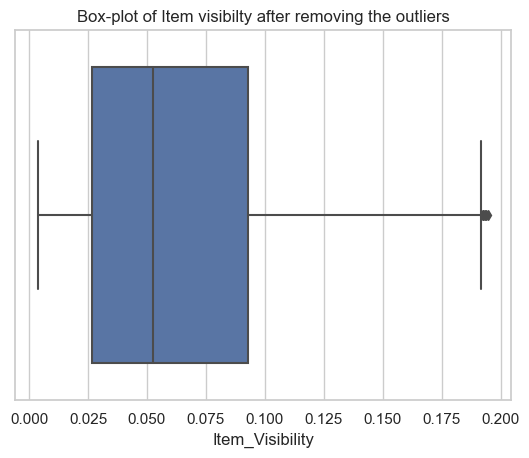

In [26]:
plt.title('Box-plot of Item visibilty after removing the outliers')
sns.boxplot('Item_Visibility',data=train)

<AxesSubplot:title={'center':'Box-plot of Item MRP'}, xlabel='Item_MRP'>

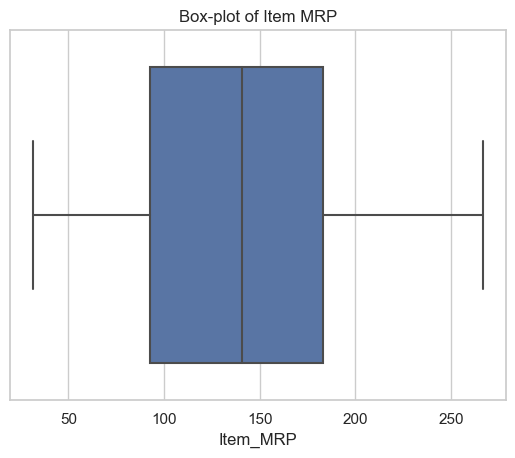

In [27]:
plt.title('Box-plot of Item MRP')
sns.boxplot('Item_MRP',data=train)

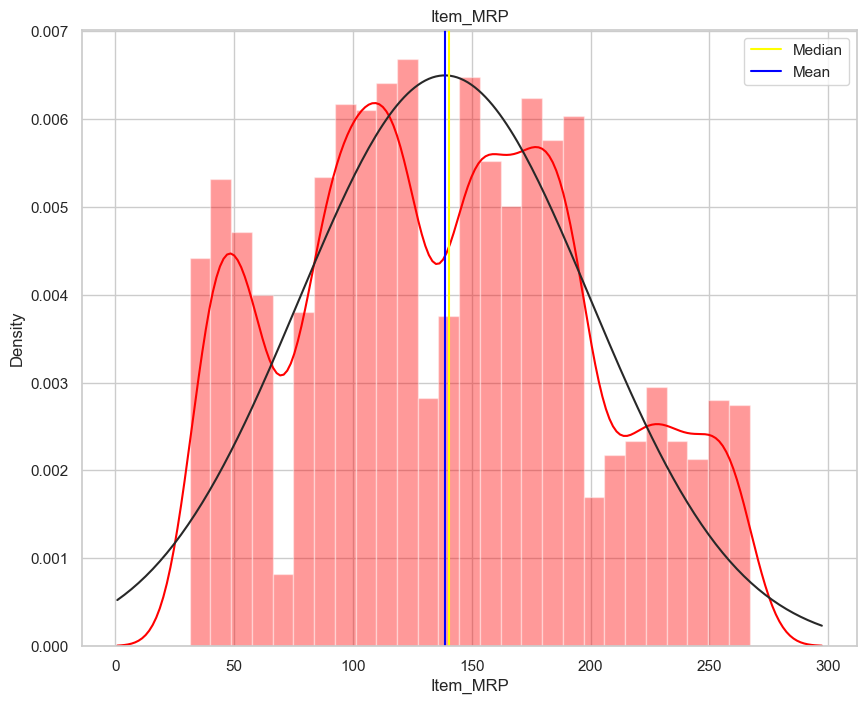

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_MRP'], fit = norm, color = 'red')
plt.title('Item_MRP')
plt.axvline(train['Item_MRP'].median(),color='yellow',label='Median')
plt.axvline(train['Item_MRP'].mean(),color='blue',label='Mean')
plt.legend()

In [29]:
print ("Skewness :", train['Item_MRP'].skew())
print("Kurtosis : ", train['Item_MRP'].kurt())

Skewness : 0.15697909808226104
Kurtosis :  -0.846738335955826


<AxesSubplot:title={'center':'Box-plot of Item weight'}, xlabel='Item_Weight'>

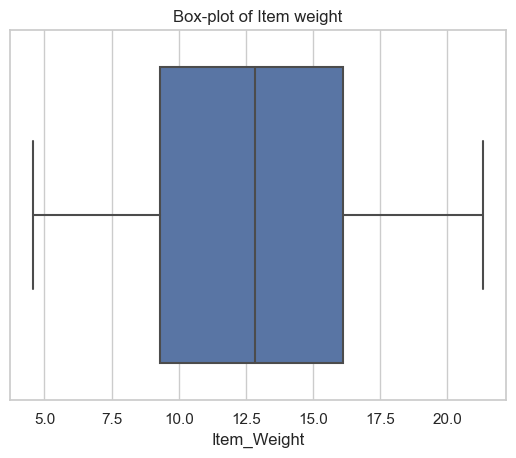

In [30]:
plt.title('Box-plot of Item weight')
sns.boxplot('Item_Weight',data=train)

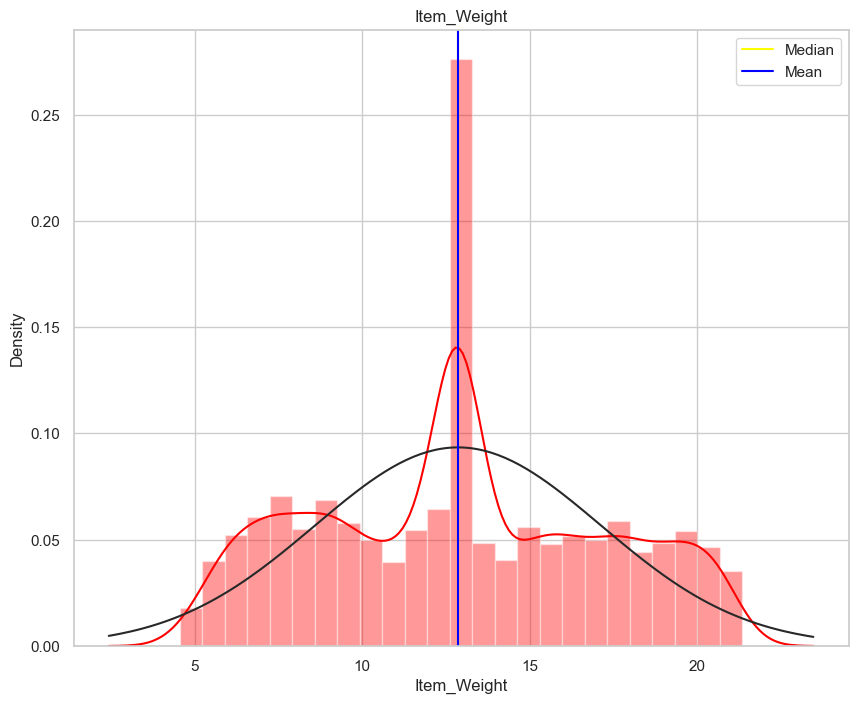

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(train['Item_Weight'], fit = norm, color = 'red')
plt.title('Item_Weight')
plt.axvline(train['Item_Weight'].median(),color='yellow',label='Median')
plt.axvline(train['Item_Weight'].mean(),color='blue',label='Mean')
plt.legend()

In [32]:
print ("Skewness :", train['Item_Weight'].skew())
print("Kurtosis : ", train['Item_Weight'].kurt())


Skewness : 0.08992664404575283
Kurtosis :  -0.899814104677056


In [33]:
train['Item_Fat_Content'].value_counts()

Low Fat    4871
Regular    2753
LF          302
reg         115
low fat     106
Name: Item_Fat_Content, dtype: int64

In [34]:
# The values LF, low fat and Low Fat are same, similarly reg and Regular. Hence replacing it to avoid confusion
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

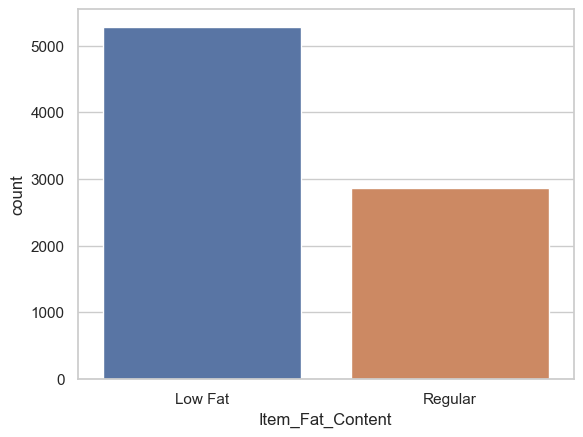

In [35]:
# Low Fat product has great count which that those product has high preferences
sns.countplot(x=train['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

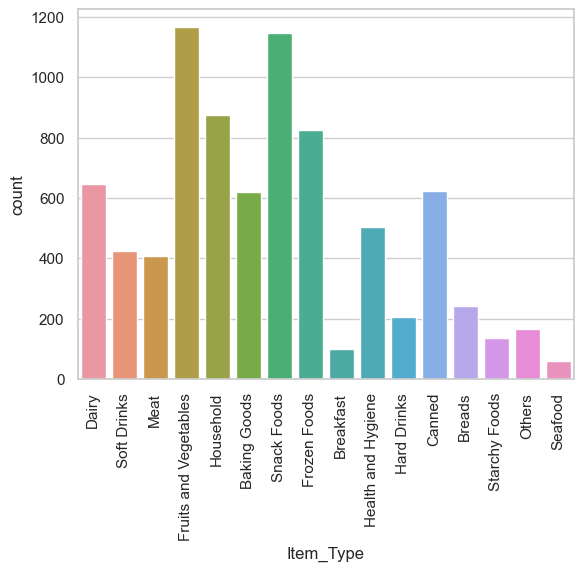

In [36]:
# Fruits and vegetables, Snacks have a great count which says that there is a good demand of these products
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

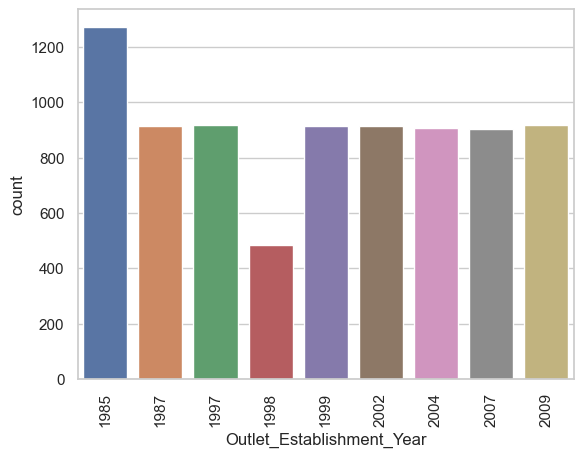

In [37]:
sns.countplot(train['Outlet_Establishment_Year'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

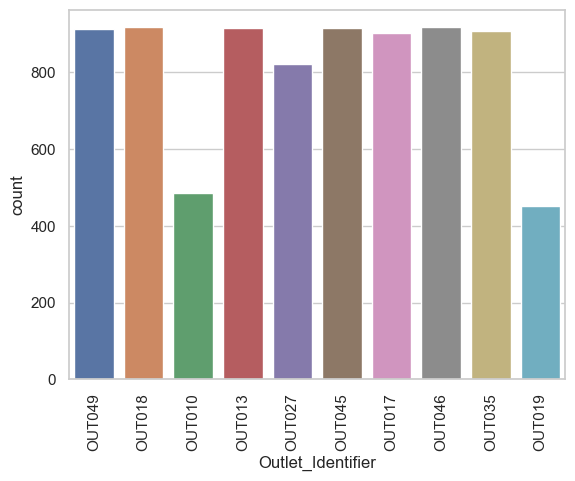

In [38]:
sns.countplot(train['Outlet_Identifier'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

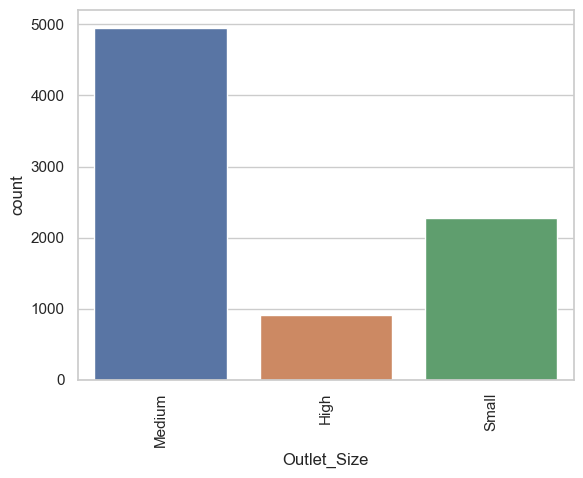

In [39]:
sns.countplot(train['Outlet_Size'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

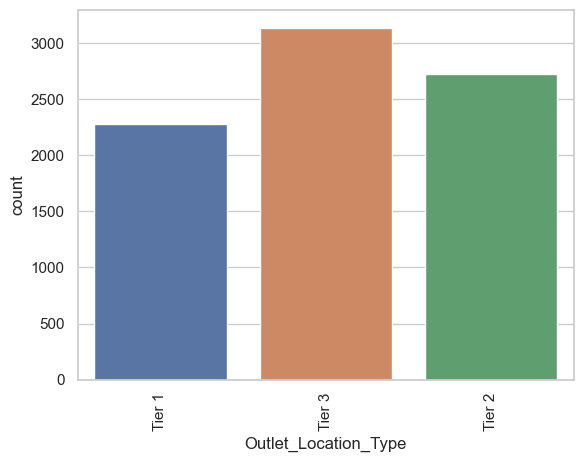

In [40]:
sns.countplot(train['Outlet_Location_Type'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

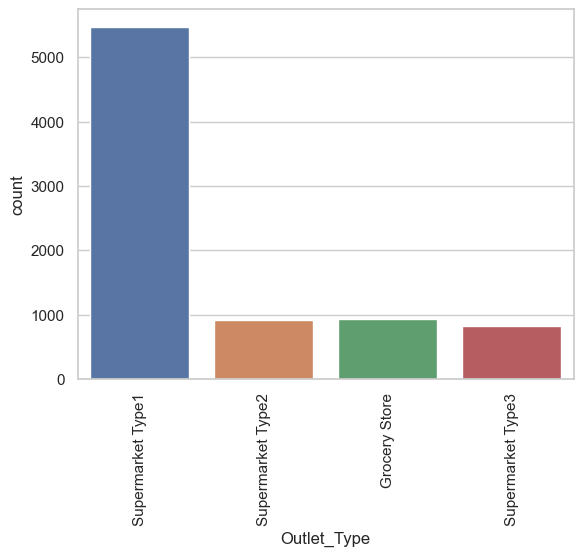

In [41]:
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=90)

<AxesSubplot:>

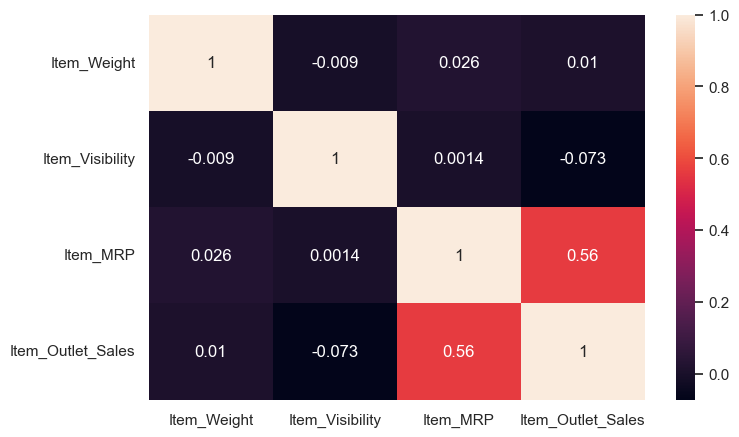

In [42]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(), annot=True)


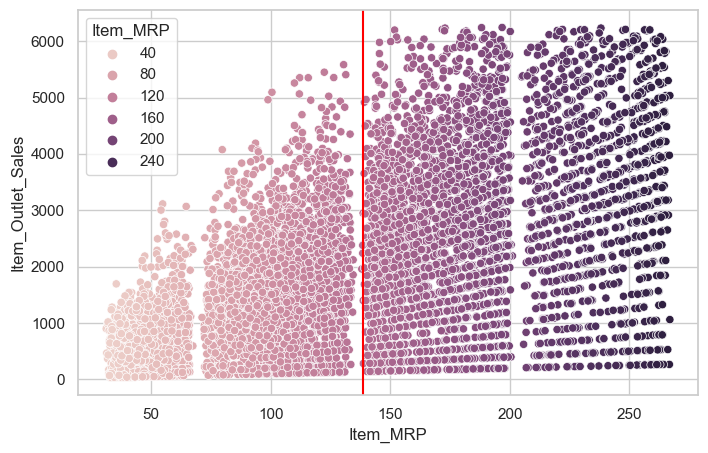

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',data=train)
plt.axvline(train['Item_MRP'].mean(),color='red',label='Mean')


##### plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Visibility', data=train,)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

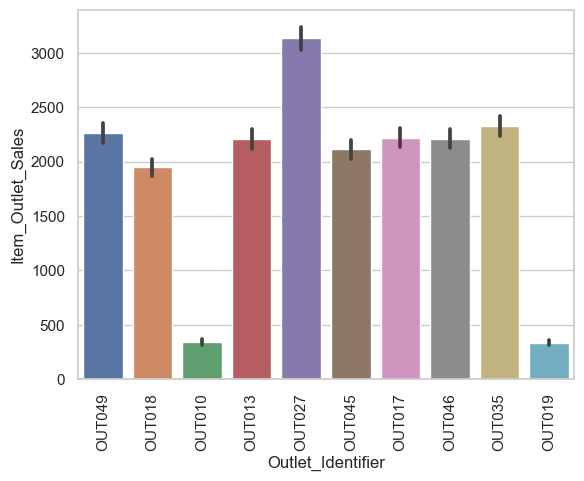

In [44]:
sns.barplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

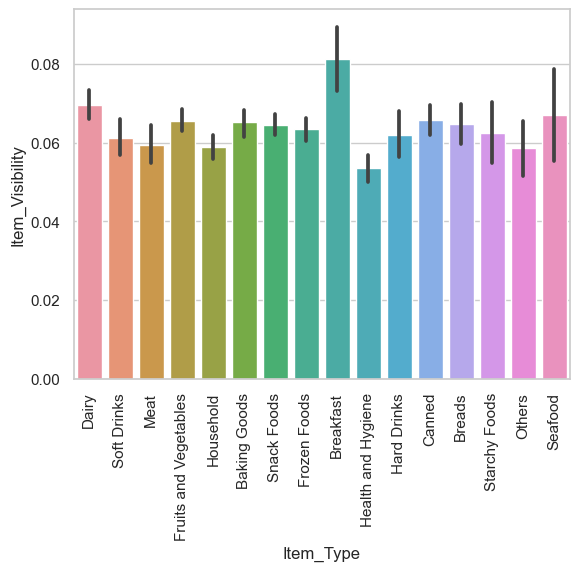

In [45]:
# The breakfast item have good visibilty
sns.barplot(train['Item_Type'],train['Item_Visibility'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

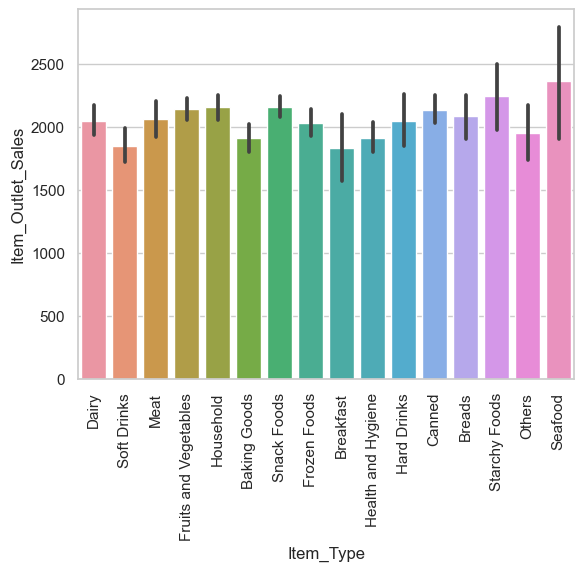

In [46]:
# Most of the items have good amount of sales
sns.barplot(train['Item_Type'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

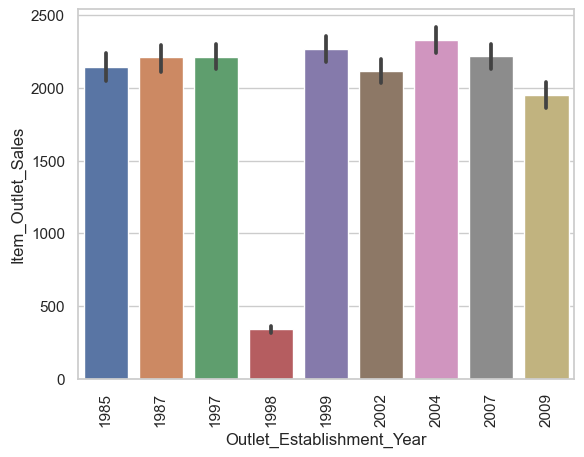

In [47]:
# Outlet Established in 1998 did not have a great sales
sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [48]:
# After the removal of outliers
train.shape

(8147, 12)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

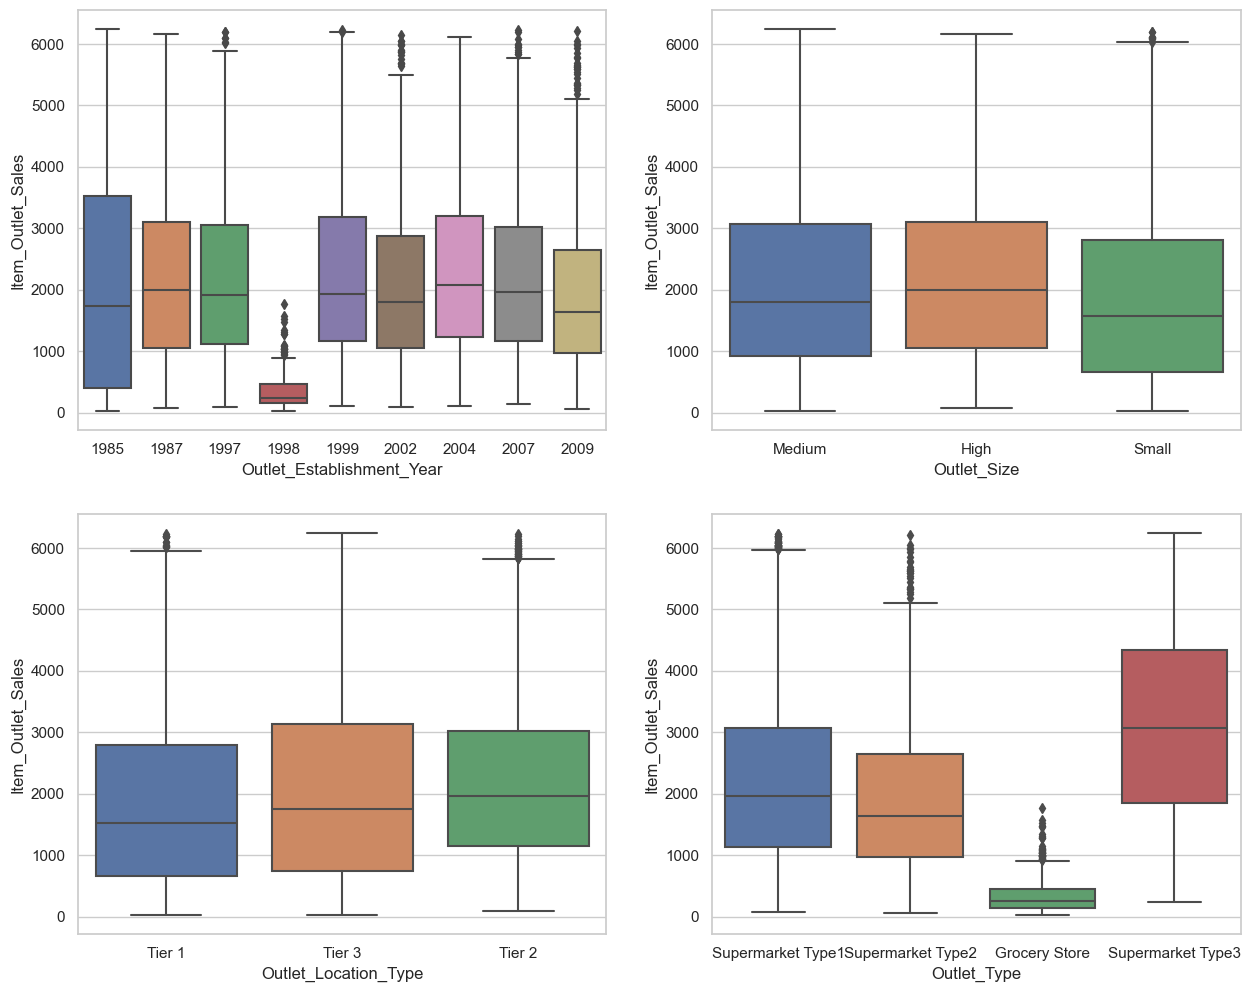

In [49]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

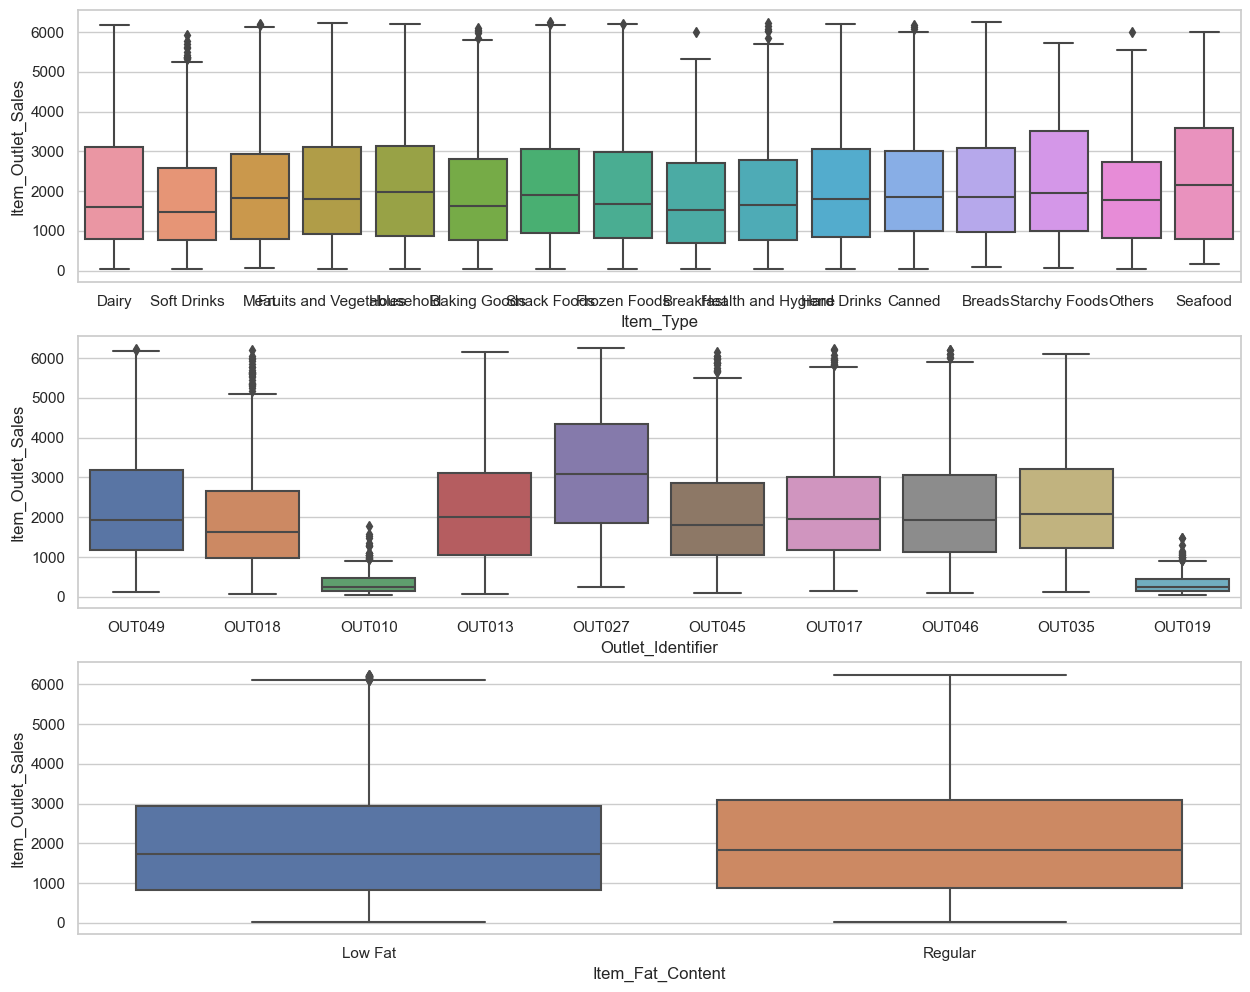

In [50]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0],data=train)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1],data=train)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axes[2],data=train)


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8147 non-null   object 
 1   Item_Weight                8147 non-null   float64
 2   Item_Fat_Content           8147 non-null   object 
 3   Item_Visibility            8147 non-null   float64
 4   Item_Type                  8147 non-null   object 
 5   Item_MRP                   8147 non-null   float64
 6   Outlet_Identifier          8147 non-null   object 
 7   Outlet_Establishment_Year  8147 non-null   object 
 8   Outlet_Size                8147 non-null   object 
 9   Outlet_Location_Type       8147 non-null   object 
 10  Outlet_Type                8147 non-null   object 
 11  Item_Outlet_Sales          8147 non-null   float64
dtypes: float64(4), object(8)
memory usage: 827.4+ KB


In [52]:
# Mapping the binary features
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [53]:
# Creating dummy variables of all the other categorical features
Itemtype = pd.get_dummies(train['Item_Type'],prefix='ItemType',drop_first=True)
train = pd.concat([train,Itemtype],axis=1)

OutID = pd.get_dummies(train['Outlet_Identifier'],prefix='OutIden',drop_first=True)
train = pd.concat([train,OutID],axis=1)

OutLoctype = pd.get_dummies(train['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
train = pd.concat([train,OutLoctype],axis=1)

Outtype = pd.get_dummies(train['Outlet_Type'],prefix='OutTy',drop_first=True)
train = pd.concat([train,Outtype],axis=1)

OutSz = pd.get_dummies(train['Outlet_Size'],prefix='OutSz',drop_first=True)
train = pd.concat([train,OutSz],axis=1)

OutEYr = pd.get_dummies(train['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
train = pd.concat([train,OutEYr],axis=1)

In [54]:
train.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [55]:
X = train.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

y = train['Item_Outlet_Sales']

In [56]:
X.shape

(8147, 43)

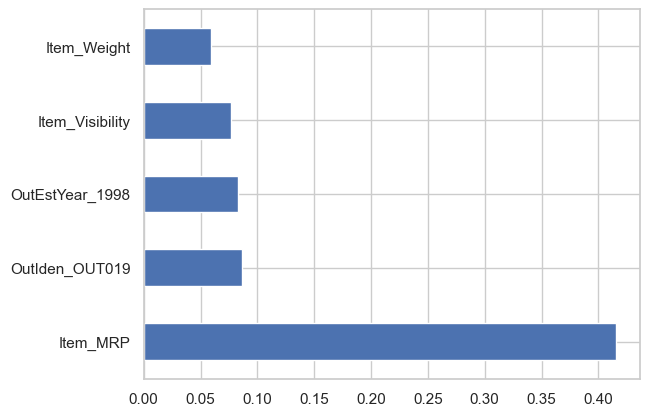

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_linreg = lin_reg.predict(x_test)

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_linreg)
MAE=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5524600608929482
Root Mean Squared Error :  1005.8146641606977
Mean Absolute Error :  777.538977475724


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


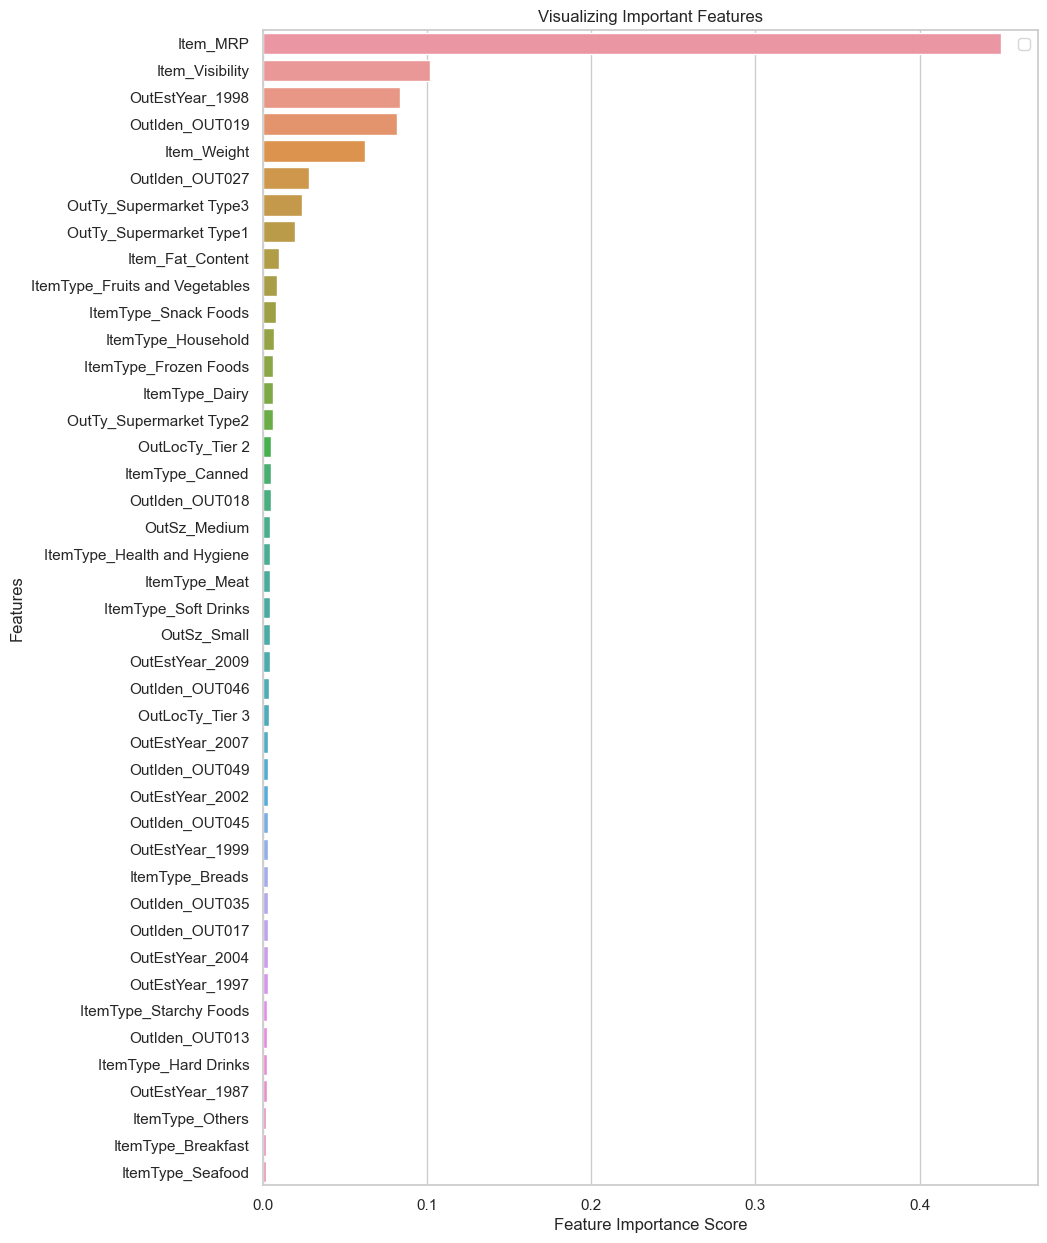

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)

feature_imp = pd.Series(reg.feature_importances_,index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [62]:
rfr_reg=RandomForestRegressor(n_estimators=200)
rfr_reg.fit(x_train,y_train)

y_rfreg = rfr_reg.predict(x_test)

In [63]:
MSE=mean_squared_error(y_test,y_rfreg)
MAE=mean_absolute_error(y_test,y_rfreg)
r2=r2_score(y_test,y_rfreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5516865602612595
Root Mean Squared Error :  1006.6834831633995
Mean Absolute Error :  741.2623561067484


Comparing the 2 models we can say that the Random forest model is the best as it has good metrics value.

For predicting the test data, we will use both the models.



# TESTING PHASE

The same data cleaning steps will were taken for the test data and then the regression models will be used to predict the Item outlet sale for the unseen data.

In [64]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [66]:
test['Outlet_Establishment_Year']  = test['Outlet_Establishment_Year'].astype('object')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   object 
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), object(8)
memory usage: 488.3+ KB


In [67]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [68]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [69]:
test['Outlet_Size'] = test['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].median())
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [70]:
test['Outlet_Size'] = test['Outlet_Size'].replace(1.000000,'Small')
test['Outlet_Size'] = test['Outlet_Size'].replace(2.000000,'Medium')
test['Outlet_Size'] = test['Outlet_Size'].replace(3.000000,'High')

In [71]:
test['Item_Visibility'] = test['Item_Visibility'].replace(0.000000,0.003591414)

In [72]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065907,141.023273
std,4.245189,0.050973,61.809091
min,4.555000,0.003591,31.990000
25%,9.195000,0.027047,94.412000
50%,12.695633,0.054154,141.415400
75%,15.850000,0.093463,186.026600
max,21.350000,0.323637,266.588400


<AxesSubplot:title={'center':'Box-plot of Item visibilty'}, xlabel='Item_Visibility'>

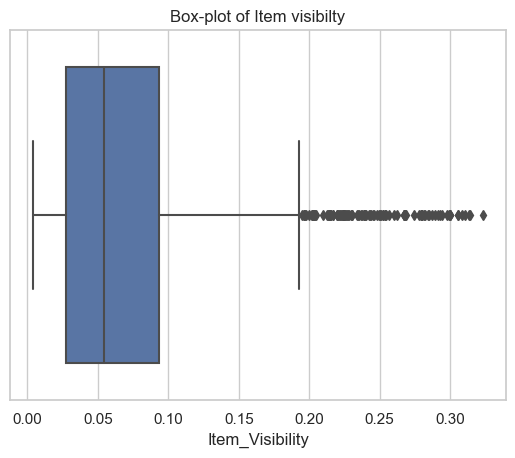

In [73]:
plt.title('Box-plot of Item visibilty')
sns.boxplot('Item_Visibility',data=test)

In [74]:
test=test[test['Item_Visibility']<0.19]

<AxesSubplot:title={'center':'Box-plot of Item visibilty after removing the outliers'}, xlabel='Item_Visibility'>

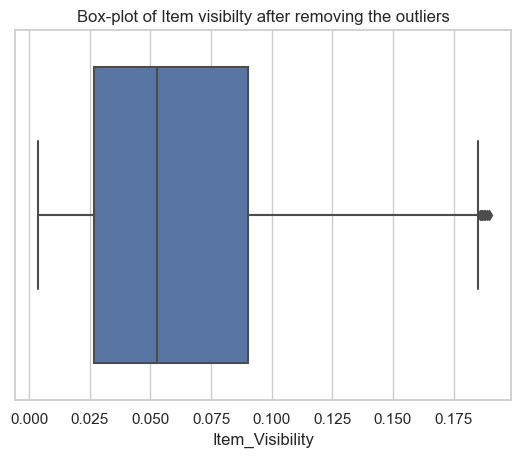

In [75]:
plt.title('Box-plot of Item visibilty after removing the outliers')
sns.boxplot('Item_Visibility',data=test)

<AxesSubplot:title={'center':'Box-plot of Item Weight'}, xlabel='Item_Weight'>

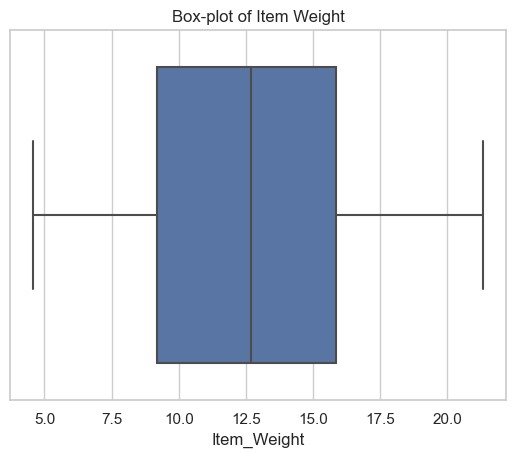

In [76]:
plt.title('Box-plot of Item Weight')
sns.boxplot('Item_Weight',data=test)

<AxesSubplot:title={'center':'Box-plot of Item MRP'}, xlabel='Item_MRP'>

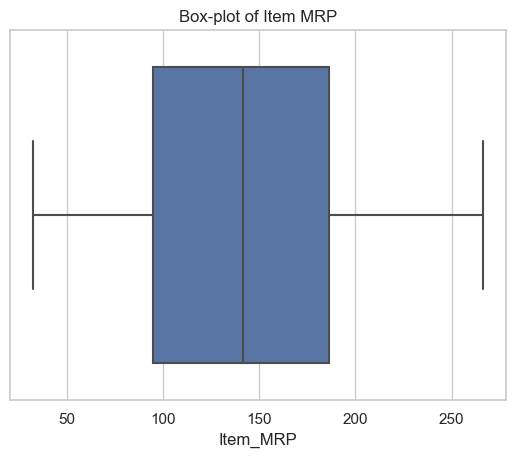

In [77]:
plt.title('Box-plot of Item MRP')
sns.boxplot('Item_MRP',data=test)

In [78]:
test.shape

(5567, 11)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5567 non-null   object 
 1   Item_Weight                5567 non-null   float64
 2   Item_Fat_Content           5567 non-null   object 
 3   Item_Visibility            5567 non-null   float64
 4   Item_Type                  5567 non-null   object 
 5   Item_MRP                   5567 non-null   float64
 6   Outlet_Identifier          5567 non-null   object 
 7   Outlet_Establishment_Year  5567 non-null   object 
 8   Outlet_Size                5567 non-null   object 
 9   Outlet_Location_Type       5567 non-null   object 
 10  Outlet_Type                5567 non-null   object 
dtypes: float64(3), object(8)
memory usage: 521.9+ KB


In [80]:
Prediction_LR = pd.DataFrame(test['Item_Identifier'])
Prediction_LR['Outlet_Identifier'] = test['Outlet_Identifier']

In [81]:
Prediction_RFR = pd.DataFrame(test['Item_Identifier'])
Prediction_RFR['Outlet_Identifier'] = test['Outlet_Identifier']

In [82]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')

In [83]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 0})

In [84]:
Itemtype = pd.get_dummies(test['Item_Type'],prefix='ItemType',drop_first=True)
test = pd.concat([test,Itemtype],axis=1)

OutID = pd.get_dummies(test['Outlet_Identifier'],prefix='OutIden',drop_first=True)
test = pd.concat([test,OutID],axis=1)

OutLoctype = pd.get_dummies(test['Outlet_Location_Type'],prefix='OutLocTy',drop_first=True)
test = pd.concat([test,OutLoctype],axis=1)

Outtype = pd.get_dummies(test['Outlet_Type'],prefix='OutTy',drop_first=True)
test = pd.concat([test,Outtype],axis=1)

OutSz = pd.get_dummies(test['Outlet_Size'],prefix='OutSz',drop_first=True)
test = pd.concat([test,OutSz],axis=1)

OutEYr = pd.get_dummies(test['Outlet_Establishment_Year'],prefix='OutEstYear',drop_first=True)
test = pd.concat([test,OutEYr],axis=1)

In [85]:
test.drop(['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Establishment_Year'],axis=1,inplace=True)

In [86]:
test.drop('Item_Identifier',axis=1,inplace=True)

In [87]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,ItemType_Breads,ItemType_Breakfast,ItemType_Canned,ItemType_Dairy,ItemType_Frozen Foods,ItemType_Fruits and Vegetables,...,OutSz_Medium,OutSz_Small,OutEstYear_1987,OutEstYear_1997,OutEstYear_1998,OutEstYear_1999,OutEstYear_2002,OutEstYear_2004,OutEstYear_2007,OutEstYear_2009
0,20.750000,1,0.007565,107.8622,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,8.300000,0,0.038428,87.3198,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,14.600000,1,0.099575,241.7538,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,7.315000,1,0.015388,155.0340,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,12.695633,0,0.118599,234.2300,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
test.shape

(5567, 43)

In [89]:
item_sales_linreg = lin_reg.predict(test)

Prediction_LR['Item_Outlet_Sales'] = item_sales_linreg
Prediction_LR.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1847.369324
1,FDW14,OUT017,1492.123175
2,NCN55,OUT010,1724.029642
3,FDQ58,OUT017,2454.571396
4,FDY38,OUT027,4466.954746


In [90]:
score = lin_reg.score(x_train, y_train) 
print('accuracy_score overall :', score) 
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.5501822424081073
accuracy_score percent : 55.02


In [91]:
score1 = lin_reg.score(x_test, y_test)
print('accuracy_score overall :', score1)
print('accuracy_score percent :', round(score1*100,2))

accuracy_score overall : 0.5524600608929482
accuracy_score percent : 55.25


In [92]:
score = reg.score(x_train, y_train)
print('accuracy_score overall:', score)
print('accuracy_score percentage:', round(score*100,2))

accuracy_score overall: 0.9341121985118572
accuracy_score percentage: 93.41


In [93]:
score1 = reg.score(x_test, y_test)
print('accuracy_score overall:', score)
print('accuracy_score percentage:', round(score*100,2))

accuracy_score overall: 0.9341121985118572
accuracy_score percentage: 93.41
